# New York City Taxi Data Exploration

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

##  Load Files

In [217]:
#train = pd.read_csv('../input/nyc-taxi-trip-duration/train.csv')
#test = pd.read_csv('../input/nyc-taxi-trip-duration/test.csv')
#sample = pd.read_csv('../input/nyc-taxi-trip-duration/sample_submission.csv')

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sample = pd.read_csv('../input/sample_submission.csv')

### File check...!!

In [218]:
print(train.shape)
print(test.shape)

(1458644, 11)
(625134, 9)


In [219]:
train.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [220]:
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [221]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [222]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

Of course, No `dropoff_datetime` and `trip_duration` for test set.

In [223]:
#train_pickup = pd.read_csv('../input/manhattan-or-not/train_pickup_save.csv')
#train_dropoff = pd.read_csv('../input/manhattan-or-not/train_dropoff_save.csv')

#test_pickup = pd.read_csv('../input/manhattan-or-not/test_pickup_save.csv')
#test_dropoff = pd.read_csv('../input/manhattan-or-not/test_dropoff_save.csv')

train_pickup = pd.read_csv('../input/train_pickup_save.csv')
train_dropoff = pd.read_csv('../input/train_dropoff_save.csv')

test_pickup = pd.read_csv('../input/test_pickup_save.csv')
test_dropoff = pd.read_csv('../input/test_dropoff_save.csv')

### Manhattan or Not?

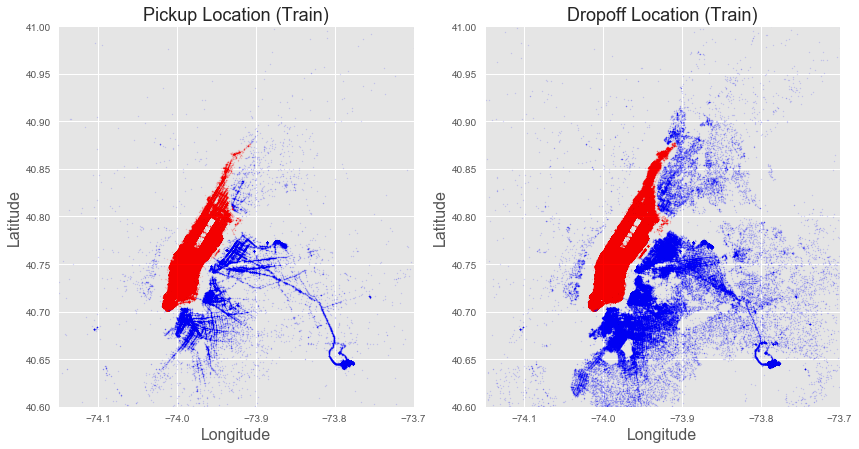

In [224]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(train.pickup_longitude[train_pickup.pickup_manhattan=='Manhattan'],
            train.pickup_latitude[train_pickup.pickup_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(train.pickup_longitude[train_pickup.pickup_manhattan=='Non-Manhattan'],
            train.pickup_latitude[train_pickup.pickup_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location (Train)',fontsize=18)

ax1 = fig.add_subplot(122)
ax1.scatter(train.dropoff_longitude[train_dropoff.dropoff_manhattan=='Manhattan'],
            train.dropoff_latitude[train_dropoff.dropoff_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(train.dropoff_longitude[train_dropoff.dropoff_manhattan=='Non-Manhattan'],
            train.dropoff_latitude[train_dropoff.dropoff_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Dropoff Location (Train)',fontsize=18)

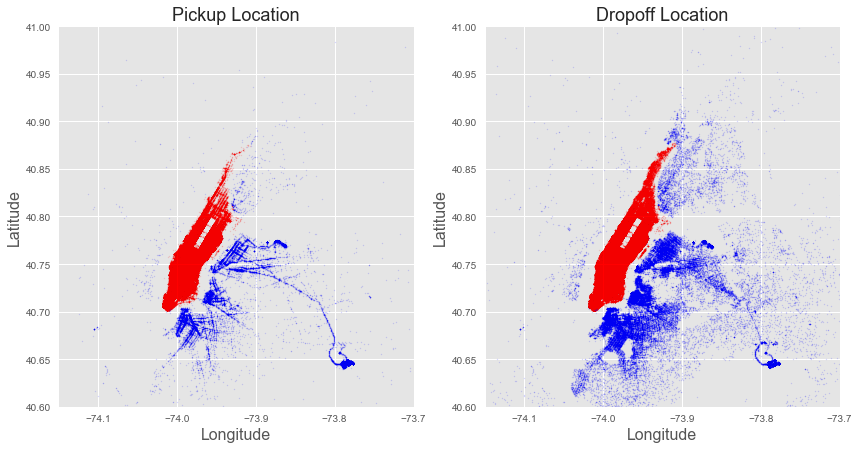

In [225]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(test.pickup_longitude[test_pickup.pickup_manhattan=='Manhattan'],
            test.pickup_latitude[test_pickup.pickup_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(test.pickup_longitude[test_pickup.pickup_manhattan=='Non-Manhattan'],
            test.pickup_latitude[test_pickup.pickup_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax1 = fig.add_subplot(122)
ax1.scatter(test.dropoff_longitude[test_dropoff.dropoff_manhattan=='Manhattan'],
            test.dropoff_latitude[test_dropoff.dropoff_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(test.dropoff_longitude[test_dropoff.dropoff_manhattan=='Non-Manhattan'],
            test.dropoff_latitude[test_dropoff.dropoff_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Dropoff Location',fontsize=18)

## Correlation Function

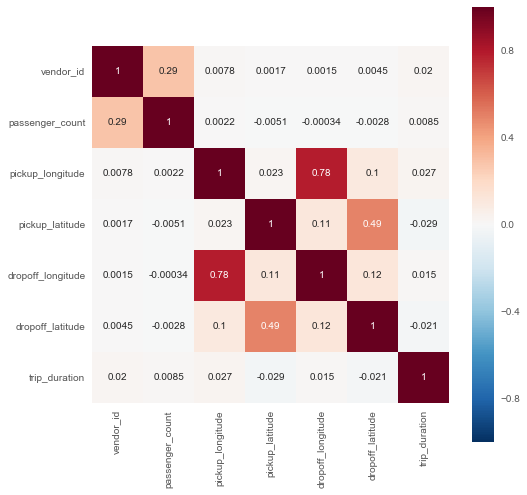

In [226]:
numtrain = train.select_dtypes(include=[np.number])
corr = numtrain.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=1,square=True,annot=True)

The highest correlation coefficient is between pickup_longitude and dropoff_longitude. This is higher than that of between pickup_langitude and dropoff_latitude, 0.49 because Manhattan is elongated in the North-South direction. This means that there is more variation in the latitude range and less variation of the longitude. 

Otherwise, most of coefficient is really very low related to `trip_duration`, which means we either have to find more sources of data or be creative in our feature engineering.

### miles

In [227]:
train['new_pickup'] = [(a,b) for a, b in zip(train.pickup_latitude,train.pickup_longitude)]
train['new_dropoff'] = [(a,b) for a, b in zip(train.dropoff_latitude,train.dropoff_longitude)]

from geopy.distance import great_circle
train['miles'] = [great_circle(a,b).miles for a, b in zip(train.new_pickup,train.new_dropoff)]

test['new_pickup'] = [(a,b) for a, b in zip(test.pickup_latitude,test.pickup_longitude)]
test['new_dropoff'] = [(a,b) for a, b in zip(test.dropoff_latitude,test.dropoff_longitude)]

test['miles'] = [great_circle(a,b).miles for a, b in zip(test.new_pickup,test.new_dropoff)]

Obviously, `miles` are not real distance because taxies cannot drive the shortest distance between two points. However, here I just simplify the driving distance as the distance between two locations.

In [228]:
train["velocity"] = train.miles/(train.trip_duration/(60*60))

In [229]:
train = train[((train.trip_duration < 10000) & (train.trip_duration >10))]

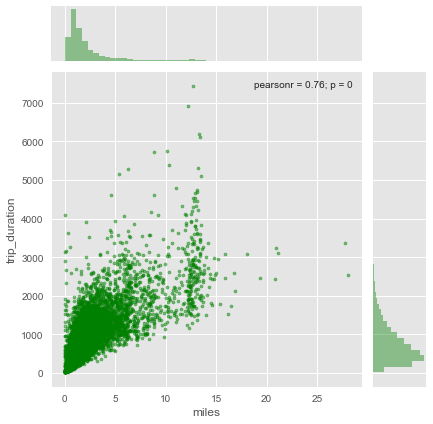

In [39]:
sns.jointplot('miles','trip_duration',data=train[:10000],s=10,alpha=0.5,color='green')

It is obvious that `miles` is correlated with `trip_duration`, but it seems to be skewed. So, I can plot with log scale.

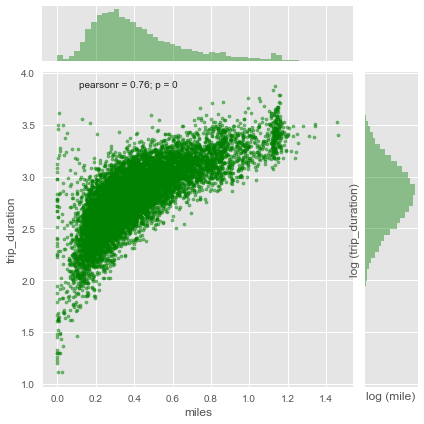

In [40]:
#plt.figure(figsize=(50,30))
sns.jointplot(np.log10(train["miles"][:10000]+1),np.log10(train["trip_duration"][:10000]+1),s=10,alpha=0.5,color='green')
plt.xlabel('log (mile)')
plt.ylabel('log (trip_duration)')

### Pickup Location & Dropoff Location

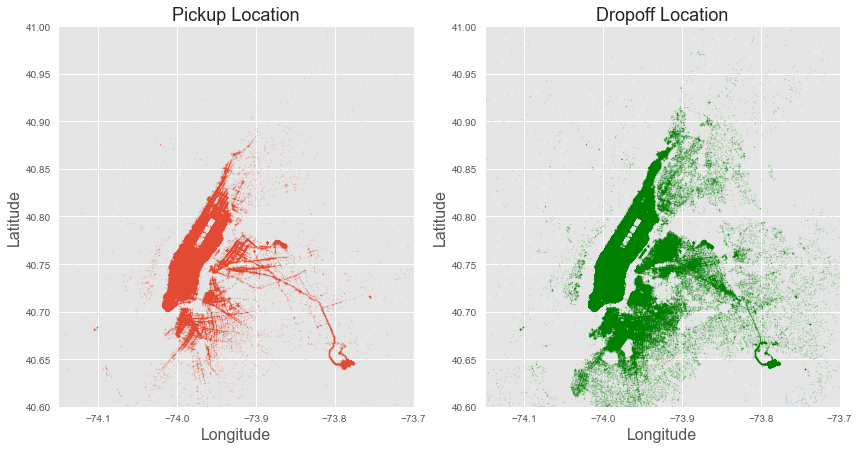

In [41]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(train.pickup_longitude,train.pickup_latitude,s=1,alpha=0.1)
plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)
ax2 = fig.add_subplot(122)
ax2.scatter(train.dropoff_longitude,train.dropoff_latitude,s=1,color='green',alpha=0.1)
plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

I can check some of the facts:

* Most of pickup location is from Manhattan.
* Some of pickup location is from either Brookline or Airport (JFK or LGA)
* Dropoff Location is more distributed in not only Manhattan but Brookline or Quincy, etc.

## DateTime

In [230]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_hour'] = train.pickup_datetime.dt.hour
train['pickup_week'] = train.pickup_datetime.dt.weekday
train['pickup_month'] = train.pickup_datetime.dt.month
train['pickup_day'] = train.pickup_datetime.dt.day

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_hour'] = test.pickup_datetime.dt.hour
test['pickup_week'] = test.pickup_datetime.dt.weekday
test['pickup_month'] = test.pickup_datetime.dt.month
test['pickup_day'] = test.pickup_datetime.dt.day

In [19]:
#import calendar
#list(calendar.day_name)
#train['pickup_week'] = train['pickup_week'].apply(lambda x: calendar.day_name[x])
#test['pickup_week'] = test['pickup_week'].apply(lambda x: calendar.day_name[x])

In [231]:
train['pickup_hour'] = train['pickup_hour'].apply(int)
test['pickup_hour'] = test['pickup_hour'].apply(int)

train['pickup_day'] = train['pickup_day'].apply(int)
test['pickup_day'] = test['pickup_day'].apply(int)

train['pickup_month'] = train['pickup_month'].apply(int)
test['pickup_month'] = test['pickup_month'].apply(int)

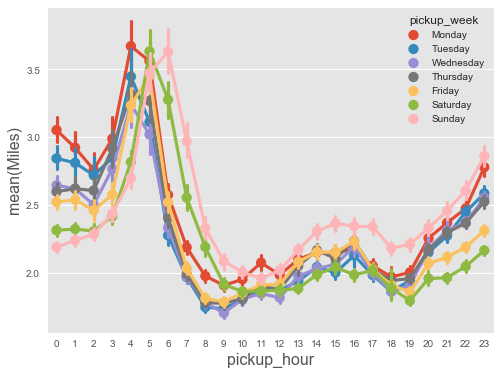

In [45]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='miles',data=train,kind='point',hue='pickup_week',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(Miles)',fontsize=16)

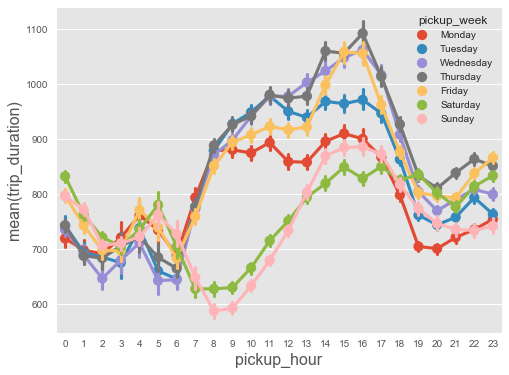

In [46]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=train,hue='pickup_week',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

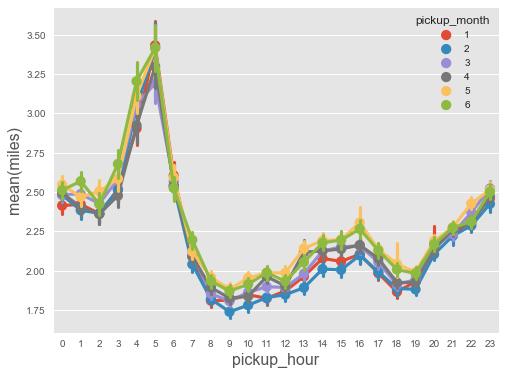

In [47]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='miles',data=train,kind='point',hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(miles)',fontsize=16)

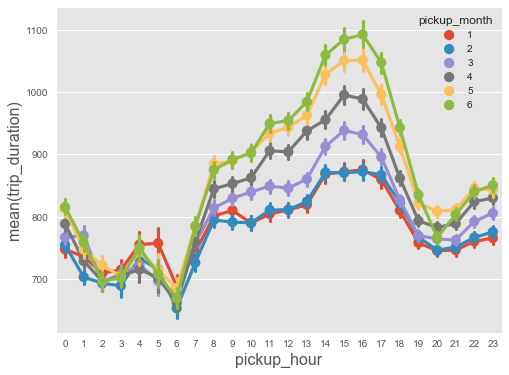

In [48]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=train,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

It is interesting that the relation with `trip_duration` and `pickup_hour` seems to change with different months in the day time (9am-7pm). 

### why are there higher pick during the warmer season daytime? Is that because of more Taxi ride or?

In [49]:
weekcount = train.groupby(['pickup_hour','pickup_week'],as_index=False).count()[['pickup_hour','pickup_week','id']]
monthcount = train.groupby(['pickup_hour','pickup_month'],as_index=False).count()[['pickup_hour','pickup_month','id']]

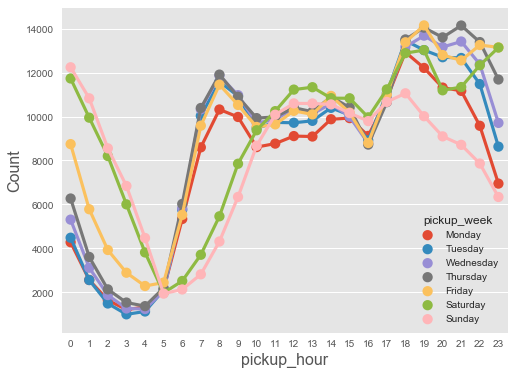

In [50]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='id',data=weekcount,hue='pickup_week',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('Count',fontsize=16)

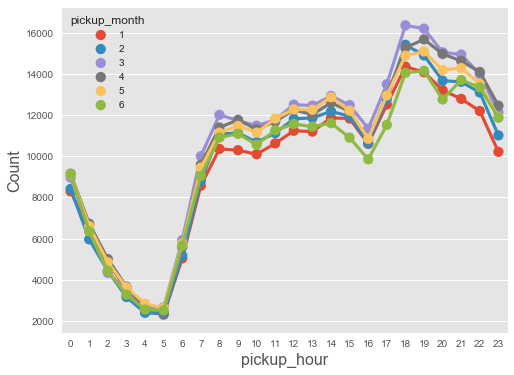

In [51]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='id',data=monthcount,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('Count',fontsize=16)

No obvious trend showing an increase in the number of rides as you go from January to June, which means the increased trip duration in later months is not due to an increases in the number of rides.  However, there could be more traffice jam due to many other cars in later months. In conclusion, there are either many more local people around or many tourists in New York City during the warmer seasons, especially day time.

### store and fwd flag

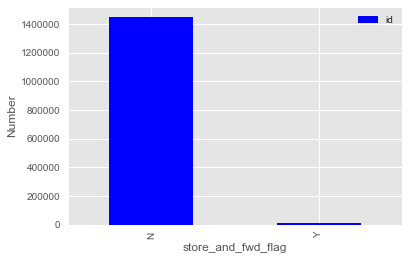

In [52]:
pd.DataFrame(train.groupby(['store_and_fwd_flag']).count()['id']).plot(kind='bar',color='blue')
plt.ylabel('Number')

### vendor_id

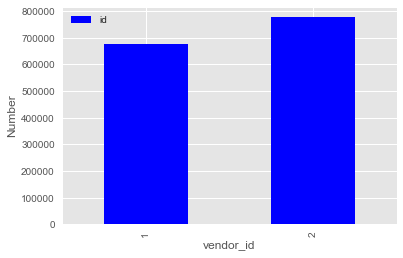

In [53]:
pd.DataFrame(train.groupby(['vendor_id']).count()['id']).plot(kind='bar',color='blue')
plt.ylabel('Number')

### passenger_count

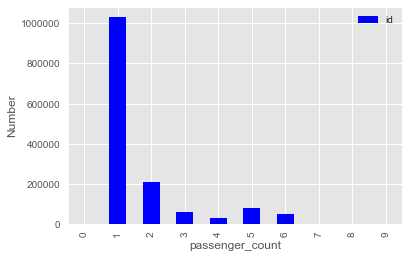

In [54]:
pd.DataFrame(train.groupby(['passenger_count']).count()['id']).plot(kind='bar',color='blue')
plt.ylabel('Number')

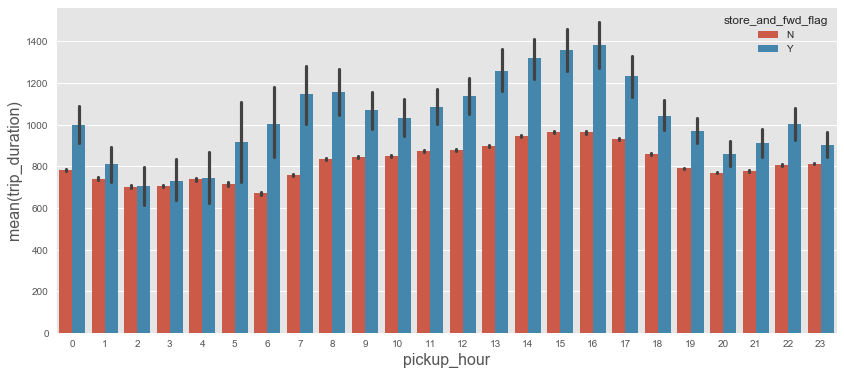

In [55]:
plt.figure(figsize=(14,6))
sns.barplot(x='pickup_hour',y='trip_duration',data=train,hue='store_and_fwd_flag')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

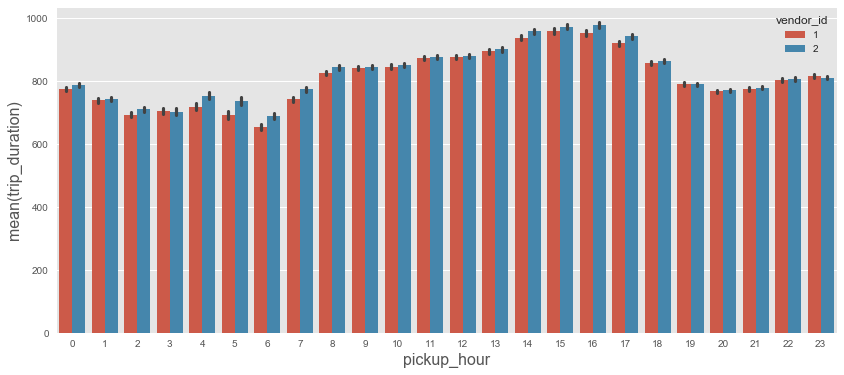

In [56]:
plt.figure(figsize=(14,6))
sns.barplot(x='pickup_hour',y='trip_duration',data=train,hue='vendor_id')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Here, I just want to simplify `passenger_count` as either one or more than one person. So,

In [21]:
#train['passenger_count'] = train.passenger_count.apply(lambda x:2 if x>=2 else 1)
#test['passenger_count'] = test.passenger_count.apply(lambda x:2 if x>=2 else 1)

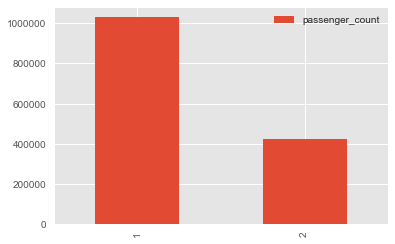

In [58]:
pd.DataFrame(train['passenger_count'].value_counts()).plot(kind='bar')

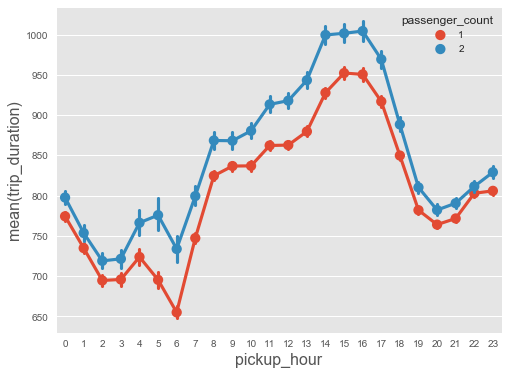

In [59]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=train,hue='passenger_count')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Here, passenger_count = 2 means that the number of passenger is more than 1.

In [232]:
train["pickup_manhattan"]=train_pickup["pickup_manhattan"].copy()
train["dropoff_manhattan"]=train_dropoff["dropoff_manhattan"].copy()

test["pickup_manhattan"]=test_pickup["pickup_manhattan"].copy()
test["dropoff_manhattan"]=test_dropoff["dropoff_manhattan"].copy()

In [233]:
train['pickup_manhattan'] = train.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)
test['pickup_manhattan'] = test.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)

In [234]:
train['dropoff_manhattan'] = train.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)
test['dropoff_manhattan'] = test.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)

In [235]:
train['store_and_fwd_flag'] = train.pickup_manhattan.apply(lambda x:1 if x=="Y" else 0)
test['store_and_fwd_flag'] = test.pickup_manhattan.apply(lambda x:1 if x=="Y" else 0)

In [236]:
from sklearn.cluster import KMeans
train_pickup_loc = pd.DataFrame()
train_pickup_loc['longitude'] = train['pickup_longitude']
train_pickup_loc['latitude'] = train['pickup_latitude']

test_pickup_loc = pd.DataFrame()
test_pickup_loc['longitude'] = test['pickup_longitude']
test_pickup_loc['latitude'] = test['pickup_latitude']

train_dropoff_loc = pd.DataFrame()
train_dropoff_loc['longitude'] = train['dropoff_longitude']
train_dropoff_loc['latitude'] = train['dropoff_latitude']

test_dropoff_loc = pd.DataFrame()
test_dropoff_loc['longitude'] = test['dropoff_longitude']
test_dropoff_loc['latitude'] = test['dropoff_latitude']

both_loc = pd.concat([train_pickup_loc,test_pickup_loc,train_dropoff_loc,test_dropoff_loc],axis=0)
kmeans = KMeans(n_clusters=15, random_state=0).fit(both_loc)


In [237]:
len_train = len(train)
len_test = len(test)

In [238]:
train['pickup_label'] = kmeans.labels_[:len_train]
test['pickup_label'] = kmeans.labels_[len_train:len_train+len_test]
train['dropoff_label'] = kmeans.labels_[len_train+len_test:len_train*2+len_test]
test['dropoff_label'] = kmeans.labels_[len_train*2+len_test:]

## Data Cleaning for Model

In [180]:
train_cleaning = train.drop(['id','pickup_datetime','dropoff_datetime', 'new_pickup','new_dropoff','velocity','trip_duration'],axis=1)
test_cleaning = test.drop(['id','pickup_datetime','new_pickup','new_dropoff'],axis=1)

In [181]:
print(train_cleaning.shape)
print(test_cleaning.shape)

(1454355, 16)
(625134, 16)


In [68]:
str_columns = ['pickup_hour','pickup_month','vendor_id','passenger_count']
for i in str_columns:
    train_cleaning[i]=train_cleaning[i].apply(str)
    test_cleaning[i]=test_cleaning[i].apply(str)

In [69]:
numerical = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_cleaning[numerical] = scaler.fit_transform(train_cleaning[numerical])
test_cleaning[numerical] = scaler.fit_transform(test_cleaning[numerical])

In [182]:
final_train = pd.get_dummies(train_cleaning)
final_test = pd.get_dummies(test_cleaning)

In [183]:
X=final_train
y=train["trip_duration"]